# Deep drilling fields
Here I'll just grab a single point in the sky and look at what some possible light curves could look like. This could be handy if one wanted to test and refine some algorithms for deciding how good a light curve is.

In [152]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [153]:
import sys
print(sys.path)

['/Users/dagoret/MacOSX/GitHub/LSST/MyCadence/DeepDrillingFields', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/obs_lsst/19.0.0-80-g0bd2bb3+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_dateloc/master-g60a36c8d46+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_observatory_model/master-g3d307a5f45+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_almanac/master-g021b69e146+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_downtimeModel/master-g55f72efa65+17/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_cloudModel/master-ge3724df529+19/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lss

In [154]:
otherpythonpaths=['/Users/dagoret/anaconda3/lib/python37.zip', '/Users/dagoret/anaconda3/lib/python3.7', '/Users/dagoret/anaconda3/lib/python3.7/lib-dynload', '', '/Users/dagoret/.local/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/dagoret/.ipython']

In [155]:
for thepath in otherpythonpaths:
    sys.path.append(thepath) # go to parent dir

# Definition of deep drilling fields

In [156]:
DDF_id=np.array([289, 743, 1426, 2411, 2782])
DDF_ra=np.array([349.386443, 0.,53.009145,34.393398,150.362355])
DDF_dec=np.array([-63.321004 ,-45.524505, -27.438943,  -5.09032 ,   2.836499])
NDDF=len(DDF_id)

# MAF

In [157]:
outDir ='output_ddf'
dbFile = '/users/dagoret/DATA/Cadence/baseline2018a.db'
opsimdb = db.OpsimDatabase(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [158]:
filters = np.array(['u', 'g', 'r', 'i', 'z', 'y'])
colors = {'u': 'cyan', 'g': 'g', 'r': 'y',
          'i': 'r', 'z': 'm', 'y': 'k'}

**Parameters to set**

In [159]:
# Set RA, Dec for a single point in the sky.
# The input ra/dec values should be in DEGREES (even for v3 databases).
ra = DDF_ra
dec = DDF_dec

mjdcol = 'observationStartMJD'
degrees = True

In [160]:
# The pass metric just passes data straight through.
metric = metrics.PassMetric(cols=['filter', 'fiveSigmaDepth', mjdcol])
slicer = slicers.UserPointsSlicer(ra, dec, lonCol='fieldRA', latCol='fieldDec', latLonDeg=degrees)
sql = ''  # 'night < 365'
bundle = metricBundles.MetricBundle(metric, slicer, sql)
# In case you are using a dither stacker, we can check what columns are 
# actually being pulled from the database.
print(bundle.dbCols)

{'fieldDec', 'observationStartMJD', 'fiveSigmaDepth', 'filter', 'fieldRA'}


# Calculation

In [161]:
bg = metricBundles.MetricBundleGroup({0: bundle}, opsimdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldRA'].
Found 2372700 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


# Plot

In [162]:
bg.plotAll(closefigs=False)

Plotting figures with "" constraint now.
Plotting complete.


# Result

In [163]:
bundle.metricValues.shape

(5,)

## Select the DDF number

In [192]:
idx=4

## Get result

In [193]:
# Let's see what the "pass" metric provided, 
# looking at the first slicepoint (i.e. our ra/dec value).
print(bundle.metricValues.data[idx].dtype.names)
# And look at some of the values.
print(bundle.metricValues.data[idx][0:20])
# Another way to access just the filter information..
print(bundle.metricValues.data[idx]['filter'][0:20])

('fieldDec', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldRA')
[(2.836499, 23.08992187, 'z', 61166.99271991, 150.362355)
 (2.836499, 23.08995596, 'z', 61166.99230324, 150.362355)
 (2.836499, 23.34637167, 'z', 63352.99642361, 150.362355)
 (2.836499, 21.95858654, 'y', 61097.23672454, 150.362355)
 (2.836499, 21.95987455, 'y', 61097.23630787, 150.362355)
 (2.836499, 23.3464982 , 'z', 63352.99684028, 150.362355)
 (2.836499, 23.34662474, 'z', 63352.99725694, 150.362355)
 (2.836499, 21.96116313, 'y', 61097.2358912 , 150.362355)
 (2.836499, 23.34675129, 'z', 63352.99767361, 150.362355)
 (2.836499, 23.55063355, 'i', 62967.05731481, 150.362355)
 (2.836499, 23.34624515, 'z', 63352.99600694, 150.362355)
 (2.836499, 21.96245228, 'y', 61097.23547454, 150.362355)
 (2.836499, 23.34611863, 'z', 63352.99559028, 150.362355)
 (2.836499, 21.96374201, 'y', 61097.23505787, 150.362355)
 (2.836499, 23.53745636, 'i', 62967.05689815, 150.362355)
 (2.836499, 23.08999005, 'z', 61166.99188657, 150.36235

In [194]:
# Count up observations per filter.
all_label=[]
print('%i Observations total at this point (All SNR levels)' % (
    bundle.metricValues.data[idx].size))
for fname in filters:
    good = np.where(bundle.metricValues.data[idx]['filter'] == fname)[0]
    print('%i Observations in %s' % (good.size, fname))
    all_label.append('%i Observations in %s' % (good.size, fname))

14056 Observations total at this point (All SNR levels)
1660 Observations in u
1313 Observations in g
2564 Observations in r
2638 Observations in i
3361 Observations in z
2520 Observations in y


Text(0.5, 1.0, 'DDF (field=2782, ra= 150.36 deg , dec= 2.84 deg) : Magnitude limit at 5$\\sigma$')

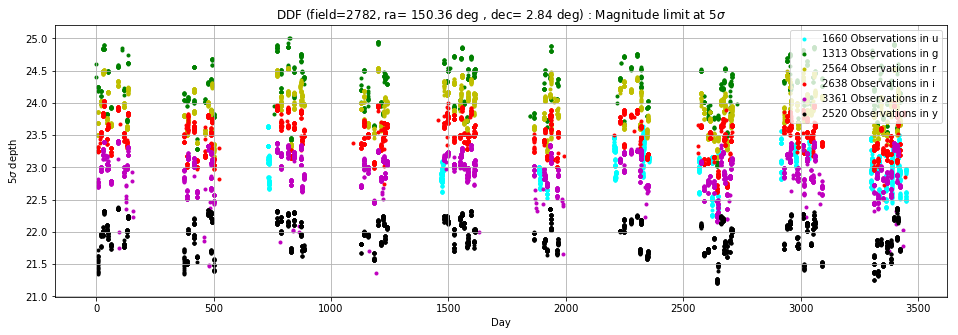

In [195]:
# Let's plot the time and m5 depth of these visits.
plt.figure(figsize=(16,5))
dayZero = bundle.metricValues.data[idx][mjdcol].min()
idf=0
for fname in filters:
    good = np.where(bundle.metricValues.data[idx]['filter'] == fname)
    plt.scatter(bundle.metricValues.data[idx][mjdcol][good]- dayZero, 
                bundle.metricValues.data[idx]['fiveSigmaDepth'][good],marker='.',
                c = colors[fname], label=all_label[idf])
    idf+=1
plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth')
#plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1,1))
plt.legend(scatterpoints=1, loc="upper right")
plt.grid()
plt.title("DDF (field={}, ra= {:3.2f} deg , dec= {:3.2f} deg) : Magnitude limit at 5$\sigma$".format(DDF_id[idx],DDF_ra[idx],DDF_dec[idx]))

In [196]:
bundle.metricValues.data[idx]

array([(2.836499, 23.08992187, 'z', 61166.99271991, 150.362355),
       (2.836499, 23.08995596, 'z', 61166.99230324, 150.362355),
       (2.836499, 23.34637167, 'z', 63352.99642361, 150.362355), ...,
       (2.836499, 23.13643866, 'z', 62970.00481481, 150.362355),
       (2.836499, 23.13553137, 'z', 62970.00439815, 150.362355),
       (2.836499, 23.12633647, 'i', 60442.97436343, 150.362355)],
      dtype=(numpy.record, [('fieldDec', '<f8'), ('fiveSigmaDepth', '<f8'), ('filter', '<U1'), ('observationStartMJD', '<f8'), ('fieldRA', '<f8')]))